# Task 12 - KMeans
## Pattern Recognition and Machine Learning

In [1]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from kmeans import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

#### Load data

In [2]:
data = np.load("data_letters_kmeans.npz", allow_pickle=True)
letters_images = data["images"]
data = np.load("data_numbers_kmeans.npz", allow_pickle=True)
numbers_images = data["images"]

#### K-means (HLT letters)

K-means, K=3...


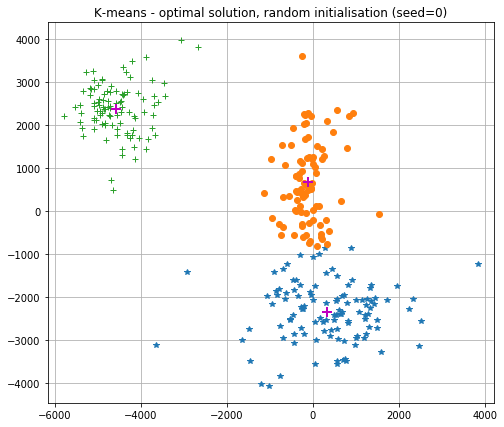

In [3]:
# np.random.seed(0)

print('K-means, K=3...')
x = compute_measurements(letters_images.astype(np.float64))
k = 3

cluster_labels, centroids, sq_dist = k_means(x, k, 100, show=True)
show_clusters(x, cluster_labels, centroids, title='K-means, random initialisation'.format(seed))



### Letters - Clusters visualisation

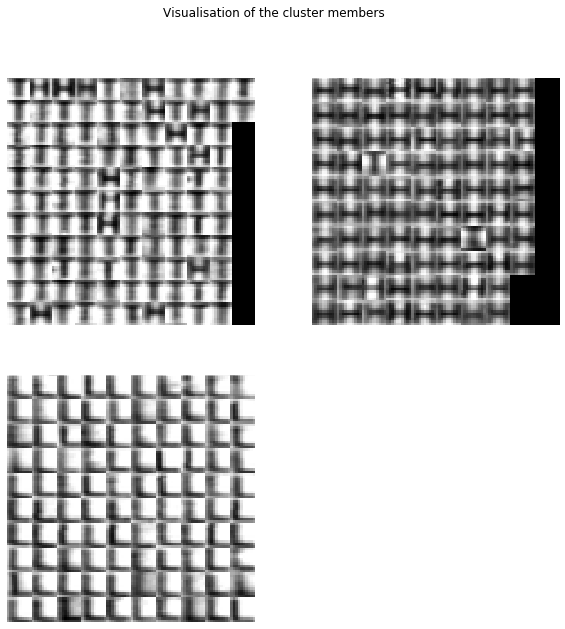

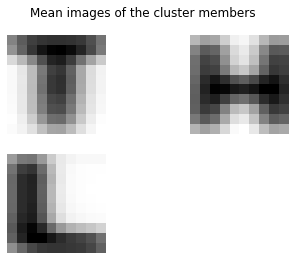

In [4]:
show_clustered_images(letters_images, cluster_labels, title='Visualisation of the cluster members')
show_mean_images(letters_images, cluster_labels, title='Mean images of the cluster members');

## Interactive visualisation (optional)

In [5]:
try:
    from ipywidgets import interact, interactive, fixed
    
    seed = 0
    np.random.seed(seed)
    x = gen_kmeanspp_data()
    
    @interact(k=(2,8), n_iter=(0, 50, 1))
    def plot_k_means(k=4, n_iter=0):
        np.random.seed(seed)
        centroids = x[:, np.random.choice(range(x.shape[1]), k, replace=False)]
        if n_iter==0:
            show_clusters(x, np.ones([1, x.shape[1]]), centroids, title='K-means init')
        else:
            cluster_labels, centroids, _ = k_means(x, k, n_iter, False, centroids)
            show_clusters(x, cluster_labels, centroids, title='K-means {:d}-iters'.format(n_iter))

except ImportError:
    print('Optional feature.')

interactive(children=(IntSlider(value=4, description='k', max=8, min=2), IntSlider(value=0, description='n_ite…

## K-means (numbers)

K-means, K=10...


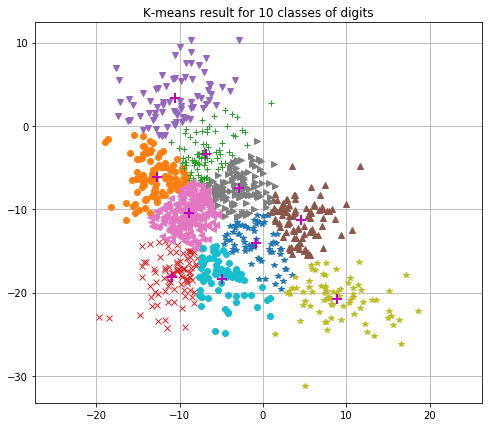

In [6]:
# np.random.seed(0)

print('K-means, K=10...')
x = compute_measurements(numbers_images)
k = 10
cluster_labels, centroids, _ = k_means(x, k, np.inf)
show_clusters(x, cluster_labels, centroids, title='K-means result for 10 classes of digits')

### Numbers - Clusters visualisation

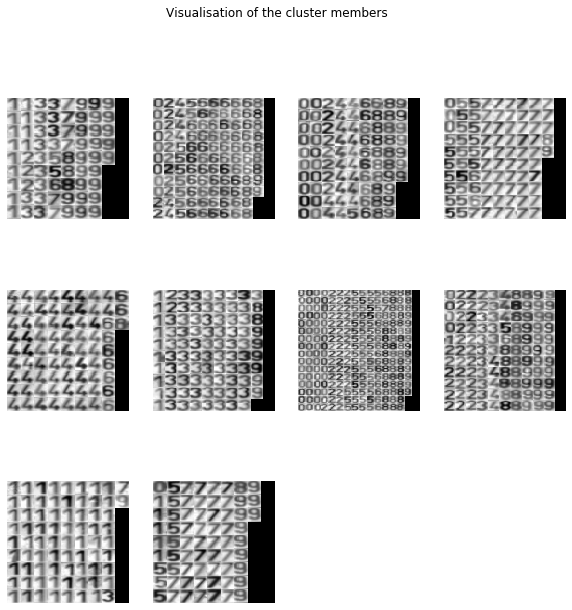

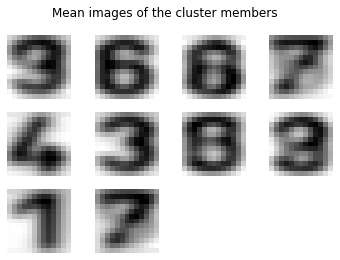

In [7]:
show_clustered_images(numbers_images, cluster_labels, title='Visualisation of the cluster members');
show_mean_images(numbers_images, cluster_labels, title='Mean images of the cluster members');

## Avoid local minima

K-means with multiple trials...
The best clustering so far!


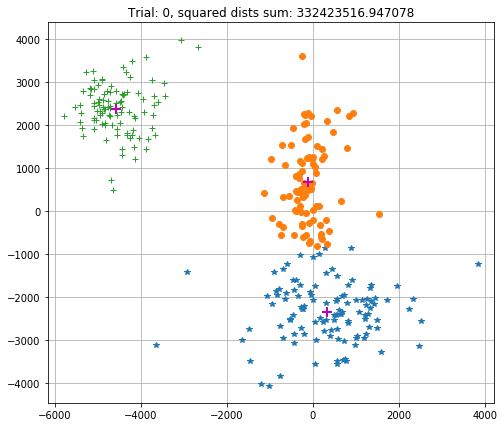

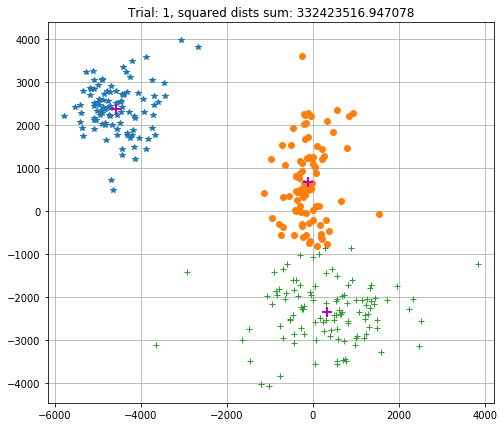

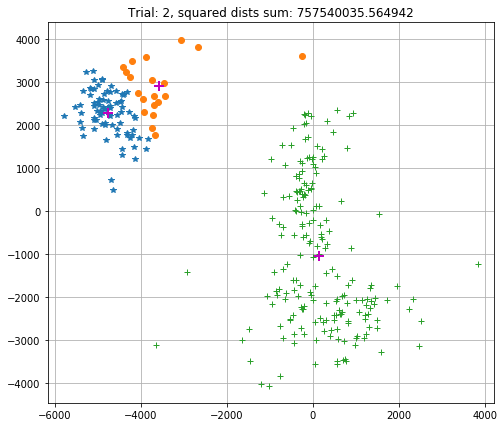

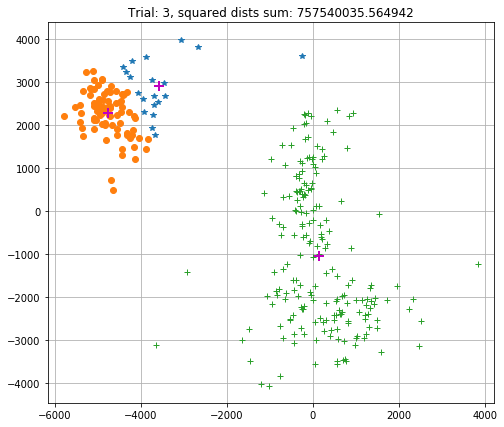

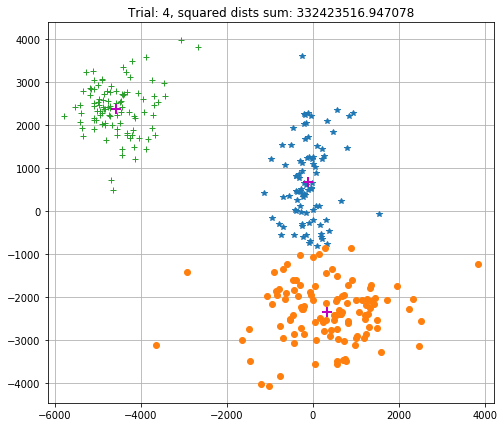

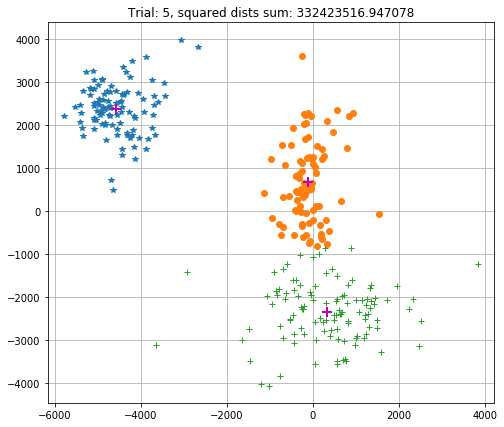

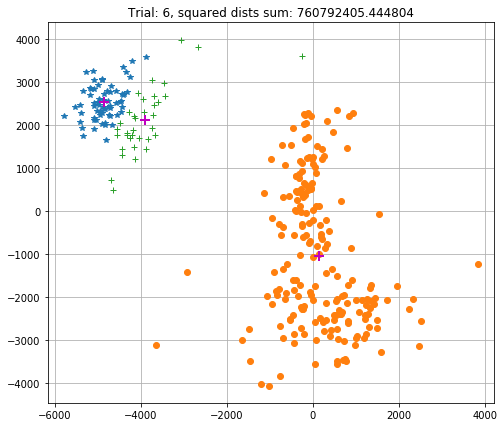

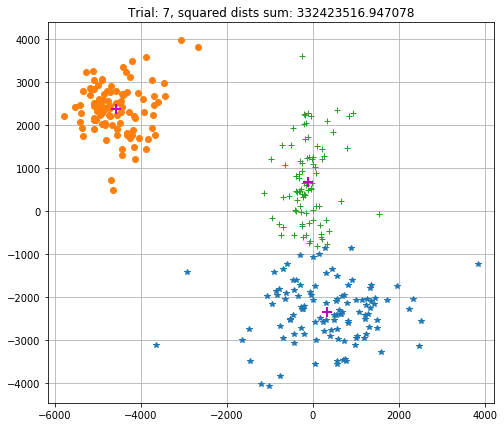

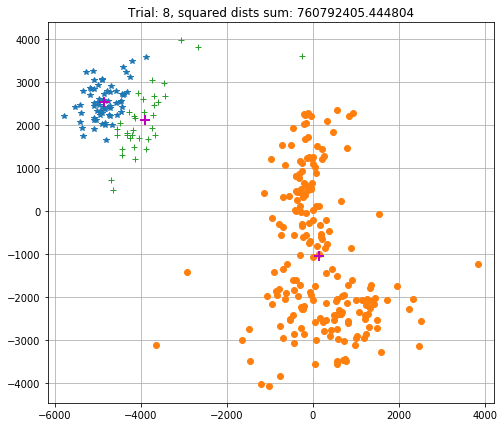

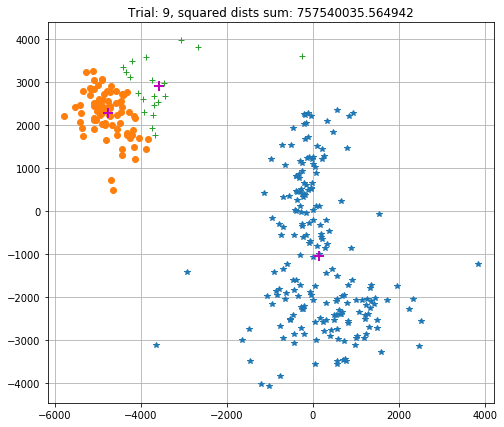

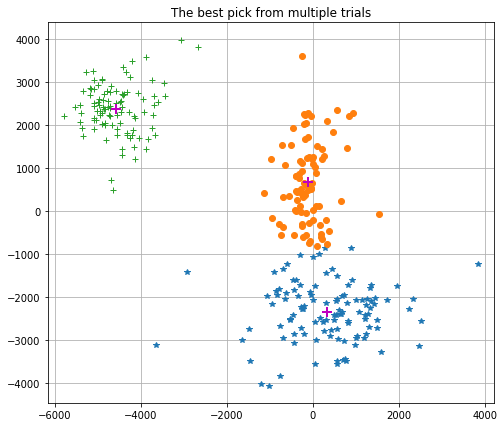

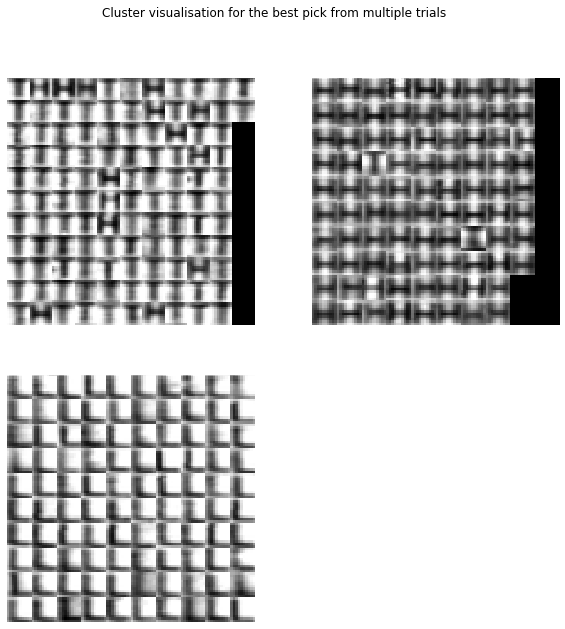

In [8]:
# np.random.seed(0)

print('K-means with multiple trials...')
x = compute_measurements(letters_images)
k = 3
cluster_labels_m, centroids_m, x_dists_m = k_means_multiple_trials(x, k, 10, np.inf, show=True)
show_clusters(x, cluster_labels_m, centroids_m, title='The best pick from multiple trials')
show_clustered_images(letters_images, cluster_labels_m, title='Cluster visualisation for the best pick from multiple trials')

## Random initialization (try this block multiple times)


K-means, K=4...


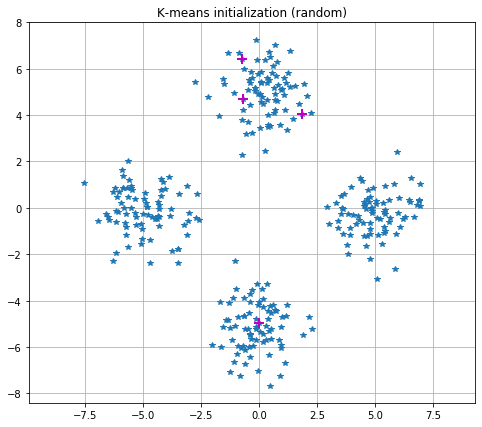

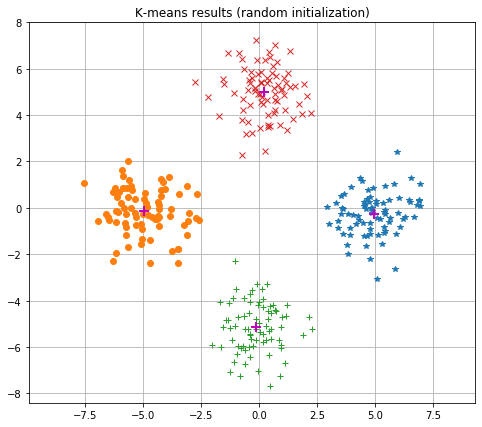

In [9]:
# np.random.seed(0)

print('K-means, K=4...')
x = gen_kmeanspp_data()
k = 4
centroids = x[:, np.random.choice(range(x.shape[1]), k, replace=False)]
show_clusters(x, np.ones([1, x.shape[1]]), centroids)
plt.title('K-means initialization (random)')
plt.savefig('random_initialization.png')
cluster_labels, centroids, _ = k_means(x, k, np.inf, False, centroids)
show_clusters(x, cluster_labels, centroids)
plt.title('K-means results (random initialization)');

## K-means++ initialization  (try this block multiple times)

K-means++, K=4...


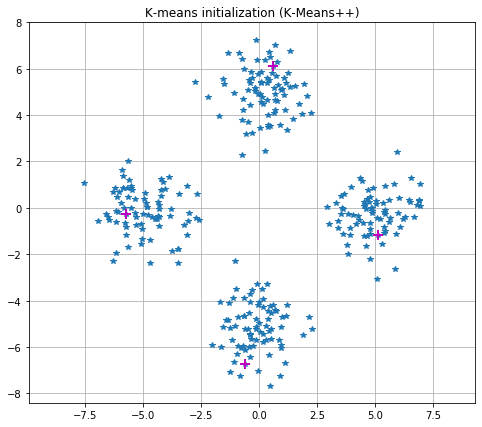

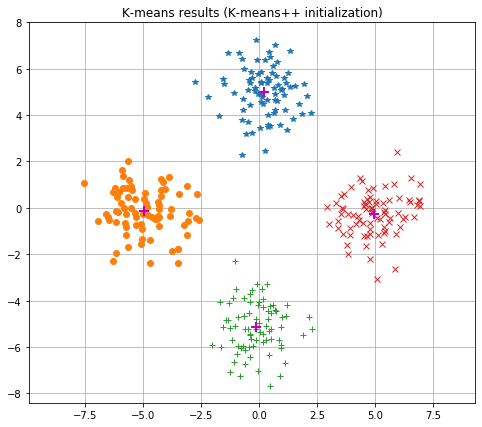

In [10]:
# np.random.seed(0)

print('K-means++, K=4...')
x = gen_kmeanspp_data()
k = 4
centroids = k_meanspp(x, k)
show_clusters(x, np.ones([x.shape[1]]), centroids)
plt.title('K-means initialization (K-Means++)')    
plt.savefig('kmeanspp_initialization.png')
cluster_labels, centroids, _ = k_means(x, k, np.inf, False, centroids)
show_clusters(x, cluster_labels, centroids)
plt.title('K-means results (K-means++ initialization)');

## Interactive visualisation of K-Means with different initialisation (optional)

In [11]:
try:
    from ipywidgets import interact, interactive, fixed
    
    seed = 0
    np.random.seed(seed)
    x = gen_kmeanspp_data()
    
    @interact(k=(2,8), n_iter=(0, 50, 1))
    def plot_k_means_init_comparison(k=4, n_iter=0):
        cluster_labels = np.ones([x.shape[1]])
        cluster_labels_pp = np.ones([x.shape[1]])
        
        np.random.seed(seed)
        centroids = x[:, np.random.choice(range(x.shape[1]), k, replace=False)]
        np.random.seed(seed)
        centroids_pp = k_meanspp(x, k)
        
        if n_iter!=0:
            cluster_labels, centroids, _ = k_means(x, k, n_iter, False, centroids)
            cluster_labels_pp, centroids_pp, _ = k_means(x, k, n_iter, False, centroids_pp)
            
        show_clusters(x, cluster_labels, centroids, title='K-means random init ({:d}-iters)'.format(n_iter))
        show_clusters(x, cluster_labels_pp, centroids_pp, title='K-means kmeans++ init ({:d}-iters)'.format(n_iter))
        
        
except ImportError:
    print('Optional feature.')

interactive(children=(IntSlider(value=4, description='k', max=8, min=2), IntSlider(value=0, description='n_ite…

## K-means Application - Color Quantization

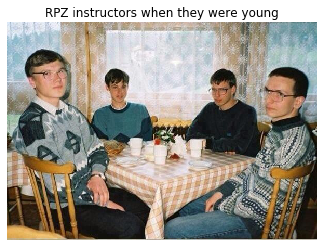

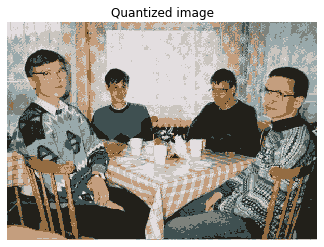

In [12]:
im = (plt.imread('geeks.png') * 255).astype(np.uint8)
plt.imshow(im)
plt.axis('off')
plt.title('RPZ instructors when they were young')

np.random.seed(0)
im_q = quantize_colors(im, 8)

plt.figure()
plt.imshow(im_q)
plt.axis('off')
plt.title('Quantized image')
plt.savefig('geeks_quantized.png')

